<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Worksheet S6: Procesamiento de textos

## Objetivos

El objetivo de este worksheet es que aprendas las principales operaciones para el manejo de textos. Entre otros:

* Operaciones de tratamiento de textos
* Distancias para comparar cadenas
* Uso de NLTK

In [1]:
# instalar requisitos
import sys
!{sys.executable} -m pip install pandas numpy nltk wordcloud

     |████████████████████████████████| 163kB 9.6MB/s eta 0:00:01


## Carga de datos

Como otras veces vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas para cargar una base de datos de usuarios.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('usuarios.csv')

Una vez cargados los datos debemos inspeccionarlos, antes de empezar nuestro análisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      101 non-null    object 
 1   Apellido 1  101 non-null    object 
 2   Apellido 2  101 non-null    object 
 3   Sexo        97 non-null     object 
 4   Municipio   100 non-null    object 
 5   Provincia   101 non-null    object 
 6   DNI         101 non-null    int64  
 7   NIF         100 non-null    object 
 8   Edad        100 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


## Columnas que contienen textos

También podemos acceder a funciones de procesamiento de textos con la propiedad `str`. Se puede consultar en https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling todas las opciones disponibles. 

Nosotros revisaremos en este worksheet una par de ellas muy frecuentes. Con `contains` podemos quedarnos con todas las cadenas que contienen otra dada.

In [5]:
df['Municipio'].str.contains('a').value_counts() # Municipios cuyo nombre contiene una 'a'

True     82
False    18
Name: Municipio, dtype: int64

Las máscaras se pueden aplicar de forma combinada utilizando operadores binarios. Por ejemplo para combinar (AND) dos máscaras a la vez:

In [6]:
df_mask_municipio_y_nombre = (df['Municipio'].isin(['Lérida', 'Sabadell']) & df['Nombre'].str.contains('a'))

In [7]:
df[df_mask_municipio_y_nombre]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,DNI,NIF,Edad
0,Francisco,Castro,Cano,H,Lérida,Lérida,8805982,H,6.0
2,Carmen,Vázquez,Trenado,M,Sabadell,Barcelona,47915145,NaN,NaN


# Transformaciones de texto
Algunas funciones que son interesantes son:

* `upper`: convierte el texto a mayúsculas
* `lower`: convierte el texto a minúsculas
* `replace`: reemplaza todas las ocurrencias de una cadena por otra

In [7]:
df['Nombre'].str.upper().head()

0    FRANCISCO
1       XAVIER
2       CARMEN
3         ANNA
4       MANUEL
Name: Nombre, dtype: object

In [8]:
df['Nombre'].str.lower().head()

0    francisco
1       xavier
2       carmen
3         anna
4       manuel
Name: Nombre, dtype: object

In [9]:
df['Sexo'].str.replace('M','Mujer').head()

0        H
1        H
2    Mujer
3    Mujer
4        H
Name: Sexo, dtype: object

Como hemos visto anteriormente, la función apply la podemos seguir aplicando sobre columnas de texto:

In [10]:
def convierte_sexo(value):
    if value == 'H':
        return 'Hombre'
    elif value == 'M':
        return 'Mujer'
    else:
        return '?'

df['Sexo'].apply(convierte_sexo).head()

0    Hombre
1    Hombre
2     Mujer
3     Mujer
4    Hombre
Name: Sexo, dtype: object

También podemos aplicarlo sobre filas

In [11]:
def foo_filter(row):
    out = ""
    for r in row:
        out += str(r) + ","
    return out

df.apply(foo_filter, axis=1).head()

0    Francisco,Castro,Cano,H,Lérida,Lérida,8805982,...
1    Xavier,Gómez,Rendón,H,Córdoba,Córdoba,26616576...
2    Carmen,Vázquez,Trenado,M,Sabadell,Barcelona,47...
3    Anna,Alonso,López,M,nan,Zaragoza,23362379,Z,24.0,
4    Manuel,López,Martínez,H,Palma de Mallorca,Isla...
dtype: object

Una función muy útil es `map`, que nos permite "mappear" un diccionario con los valores de una columna:

In [12]:
sexo = { 'H': 'Male', 'M': 'Female'}
df['Sexo'].map(sexo).head()

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Sexo, dtype: object

## NLTK

NLTK (Natural Language Toolkit) es una biblioteca de Procesamiento de Lenguaje Natural para Python. El procesamiento de lenguaje natural es un área de la inteligencia artificial que desarrolla modelos capaces de comprender y generar texto en lenguaje natural.

NLTK no es un paquete normal, en el sentido de que con instalar el paquete no es suficiente. Para que funcione nltk es preciso descargar algunos componentes que incluyen soporte para varios idiomas, para ello utilizaremos el siguiente comando y se nos abrirá una ventana en la que podemos descargar varios paquetes. También podemos simplemente descargar los paquetes necesarios mediante el segundo comando, que son los necesarios para este notebook.

Es importante que cuando se termine de descargar el paquete, cierres la ventana de NLTK porque sino el notebook no ejecuta el siguiente paso.

In [ ]:
import nltk
nltk.download() # Menú de descarga de nltk
# nltk.download(['punkt', 'stopwords']) # Descargar únicamente los paquetes necesarios

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Podemos inicializar NLTK de la siguiente manera:

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk

Una vez descargados los requisitos necesarios e inicializado NLTK, vamos a cargar un texto con el que trabajar.

In [10]:
with open('harry_potter.txt', 'r', encoding='utf-8') as myfile:
    text = myfile.read().replace('\n', ' ')

In [11]:
print(text[0:100] + "...")

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly norma...


### Tokenización en frases
El primer problema a resolver cuando trabajamos con textos en lenguaje natural es la tokenización en frases. Esto es algo que podemos hacer con expresiones regulares buscando el carácter '.', sin embargo, nltk es más potente porque tiene en cuenta reglas idiomáticas, por ejemplo si tenemos la cadena "Hello Mr. President" y lo dividimos en frases NLTK nos devolverá una única frase.

La tokenización en frases la podemos hacer con la función `sent_tokenize`:

In [17]:
frases = sent_tokenize(text)
for i in range(4):
    print(str(i) + ": " + frases[i])

0: Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.
1: They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.
2: Mr. Dursley was the director of a firm called Grunnings, which made drills.
3: He was a big, beefy man with hardly any neck, although he did have a very large mustache.


### Tokenización en palabras

El siguiente paso natural es la descomposición de las frases en palabras. Para ello usaremos la función `word_tokenize`:

In [18]:
palabras = word_tokenize(frases[0])
print(palabras)

['Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number', 'four', ',', 'Privet', 'Drive', ',', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', ',', 'thank', 'you', 'very', 'much', '.']


### Distancias sobre cadenas

Un problema habitual al que nos enfrentamos cuando comparamos cadenas de texto es cómo compararlas. 

Uno de las criterios de distancia entre cadenas más habitual es la distancia levensthein que dado dos cadenas nos devuelve un número entero con el número mínimo de modificaciones para llegar de una palabra de otra.

https://es.wikipedia.org/wiki/Distancia_de_Levenshtein


Por ejemplo la distancia de levenshtein entre bahamas y bananas es 2, porque para llegar de bahamas a bananas tenemos que hacer dos modificaciones: 1) cambiar la h por la n y 2) cambiar la m por la n.

In [18]:
from nltk.metrics import edit_distance
edit_distance('bahamas', 'bananas')

2

Las aplicaciones de este tipo de distancias son muy variadas, pero un ejemplo clásico es la funcionalidad "quizás quisiste decir" de google, que nos sugiere los términos de búsqueda por los que queríamos buscar.

Una aplicación clásica en data cleaning, es utilizar estas métricas para encontrar inconsistencias en los datos o cadenas que han sido mal introducidas.

### Frecuencia de palabras

Otra aplicación bastante habitual cuando trabajamos con textos es medir la frecuencia de aparición de cada una de las palabras. Estudiando las frecuencia de aparición de las palabras podemos catalogar y comparar textos.

Para realizar este ejemplo vamos a utilizar El Quijote como corpus de pruebas. Como hemos visto anteriormente lo cargamos en una variable llamada `quijote`:

In [17]:
from nltk.probability import FreqDist

with open('el_quijote.txt', 'r', encoding='utf-8') as myfile:
    quijote = myfile.read().replace('\n', ' ')

print(quijote[0:300] + "...")

El ingenioso hidalgo don Quijote de la Mancha   TASA  Yo, Juan Gallo de Andrada, escribano de Cámara del Rey nuestro señor, de los que residen en su Consejo, certifico y doy fe que, habiendo visto por los señores dél un libro intitulado El ingenioso hidalgo de la Mancha, compuesto por Miguel de Cerv...


A continuación realizamos la tokenización en palabras:

In [19]:
palabras_quijote = word_tokenize(quijote)
print(str(palabras_quijote[0:8]) + " ...")

['El', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha'] ...


Ahora con la función `FreqDist` y pasándole como parámetro las palabras en una lista podemos calcular la tabla de frecuencias de las palabras:

In [20]:
fdist = FreqDist(palabras_quijote)
fdist.most_common(20)

[(',', 40174),
 ('que', 20520),
 ('de', 17988),
 ('y', 17155),
 ('la', 10201),
 ('a', 9525),
 ('.', 7969),
 ('el', 7960),
 ('en', 7900),
 ('no', 5760),
 (';', 4802),
 ('se', 4691),
 ('los', 4681),
 ('con', 4048),
 ('por', 3759),
 ('las', 3423),
 ('lo', 3390),
 ('le', 3382),
 ('su', 3320),
 ('don', 2538)]

Podemos visualizarlo con un histograma de conteo.

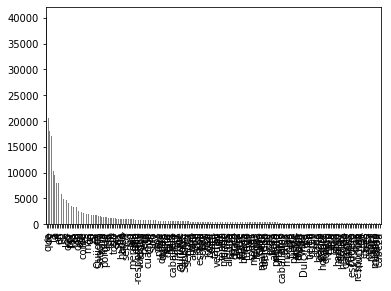

In [21]:
pd.Series(palabras_quijote).value_counts()[:200].plot(kind="bar", color = "gray")

Como hemos visto, el resultado contiene muchas palabras que sirven de unión entre elementos con significado como adjetivos y nombres, por ejemplo "que", "de", "y". Estas palabras se denominan en nltk `stopwords`. NLTK dispone de una lista de stopwords en castellano al que podemos acceder con:

In [22]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
print(str(stopwords[:40]) + " ...")

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay'] ...


Ahora lo que haremos es filtrar esas palabras junto a los símbolos de puntuación para poder quedarnos con palabras que más nos ayuden a desribir el texto.

In [25]:
palabras_quijote_filtradas = []
separadores = [',', '.', ';', ':', '?', '¿', '!', '¡']
print(palabras_quijote[:40])
for palabra in palabras_quijote:
    if palabra.lower() in stopwords:
        pass
    elif palabra.lower() in separadores:
        pass
    else:
        palabras_quijote_filtradas.append(palabra)
print("Palabras originales: " + str(len(palabras_quijote)))
print("Palabras originales filtradas:  " + str(len(palabras_quijote_filtradas)))

['El', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'TASA', 'Yo', ',', 'Juan', 'Gallo', 'de', 'Andrada', ',', 'escribano', 'de', 'Cámara', 'del', 'Rey', 'nuestro', 'señor', ',', 'de', 'los', 'que', 'residen', 'en', 'su', 'Consejo', ',', 'certifico', 'y', 'doy', 'fe', 'que', ',', 'habiendo', 'visto']
Palabras originales: 438896
Palabras originales filtradas:  186335


In [26]:
fdist = FreqDist(palabras_quijote_filtradas)
fdist.most_common(20)

[('don', 2538),
 ('si', 1794),
 ('Quijote', 1642),
 ('Sancho', 1624),
 ('tan', 1218),
 ('ser', 1056),
 ('bien', 962),
 ('señor', 948),
 ('dijo', 911),
 ('así', 905),
 ('merced', 900),
 ('-dijo', 877),
 ('-respondió', 813),
 ('sino', 694),
 ('dos', 672),
 ('pues', 638),
 ('decir', 577),
 ('caballero', 561),
 ('hacer', 535),
 ('aunque', 525)]

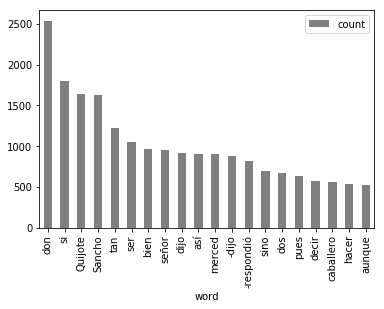

In [27]:
most_common_df = pd.DataFrame(fdist.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

También podemos buscar simplemente por término.

In [28]:
fdist['hidalgo']

63

Otra posibilidad es filtrar aquellas palabras por frecuencia que nos interesen. Quizás las que aparecen muy pocas veces no resultan interesantes.

In [29]:
freq10 = [(w, n) for w, n in fdist.items() if n > 500]
print("# de palabras: " + str(len(freq10)))
print("Mostrando 20 primeras:")
freq10[: 20]

# de palabras: 23
Mostrando 20 primeras:


[('don', 2538),
 ('Quijote', 1642),
 ('señor', 948),
 ('merced', 900),
 ('bien', 962),
 ('hacer', 535),
 ('si', 1794),
 ('así', 905),
 ('tan', 1218),
 ('aunque', 525),
 ('sino', 694),
 ('decir', 577),
 ('caballero', 561),
 ('dos', 672),
 ('dijo', 911),
 ('pues', 638),
 ('Sancho', 1624),
 ('ser', 1056),
 ('señora', 501),
 ('-respondió', 813)]

O seleccionar palabras que no nos interesen por su tamaño atópico o con poco interés, algo muy común en preprocesado de texto, tanto utilizando FreqDist como:

In [30]:
freq_len10 = [(w, n) for w, n in fdist.items() if len(w) > 10]
print("# de palabras: " + str(len(freq_len10)))
print("Mostrando 20 primeras:")
freq_len10[: 20]

# de palabras: 2785
Mostrando 20 primeras:


[('seiscientos', 17),
 ('corresponda', 4),
 ('suplicastes', 2),
 ('diligencias', 13),
 ('últimamente', 5),
 ('sentenciare', 2),
 ('sucesivamente', 1),
 ('cualesquier', 1),
 ('acogimiento', 11),
 ('determinado', 30),
 ('acatamiento', 3),
 ('agradablemente', 1),
 ('seguramente', 7),
 ('continiéndose', 1),
 ('entendimiento', 81),
 ('contravenir', 7),
 ('pensamientos', 101),
 ('incomodidad', 4),
 ('discreciones', 8),
 ('inumerabilidad', 1)]

Mostramos la distribución de frecuencias de las primeras 40 palabras que tienen más de 10 letras:

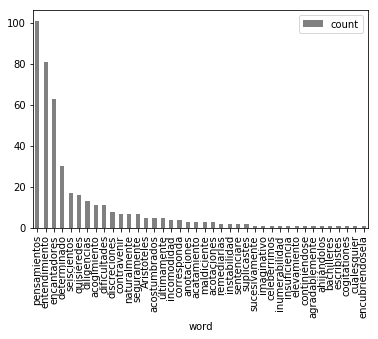

In [31]:
freq_len10_df = pd.DataFrame(freq_len10[:40]).rename(columns = {0 : "word", 1 : "count"})
freq_len10_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

### WordClouds

Una de las técnicas más utilizadas para entender la frecuencia de palabras en un texto, es hacer uso de una WordCloud. Estas son gráficas que muestran los términos aumentando el tamaño conforme su frecuencia de aparición es mayor. Son las técnicas más usadas de visualización en texto.

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

In [26]:
palabras_quijote_filtradas_join = ' '.join(palabras_quijote_filtradas)

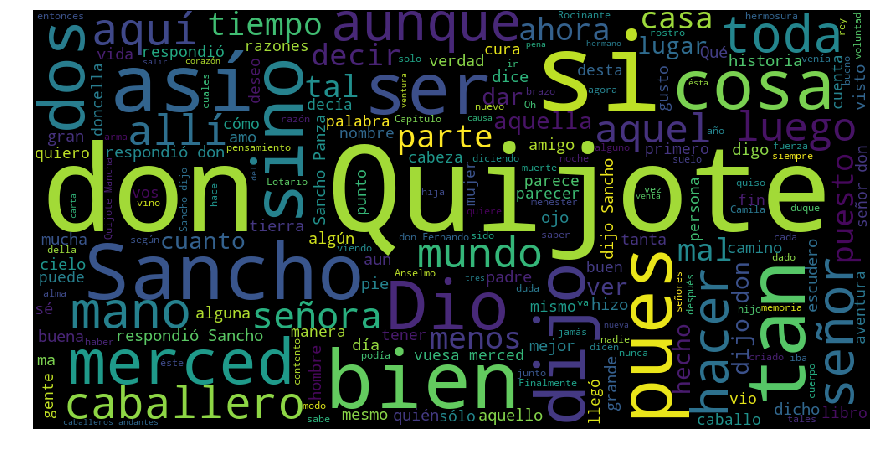

In [33]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_quijote_filtradas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

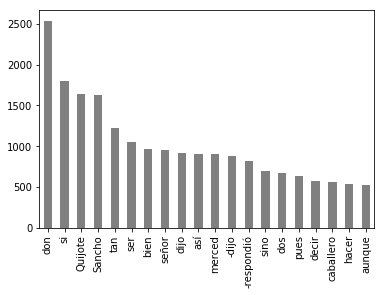

In [34]:
pd.Series(palabras_quijote_filtradas).value_counts()[:20].plot(kind="bar", color = "gray")

## Quizz

* ¿Crees que el procesamiento de lenguaje natural (NLP) es una tarea fácil o díficil para un ordenador?
* ¿Te atreves a decir como funciona la función "quizás quisiste decir" en google?. Es decir, podrías enumerar que pasos y transformaciones se hacen sobre los términos de búsqueda.
* ¿Qué relación crees que puede haber entre el NLP y el reconocimiento de voz?